In [2]:
import logging, os
logging.disable(logging.WARNING)
logging.disable(logging.INFO)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import numpy as np
import tensorflow as tf
import keras.api._v2.keras as keras
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Rescaling, \
    RandomFlip, RandomRotation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 32
IMG_HEIGHT = 160
IMG_WIDTH = 160

#Para aceder às paths indicadas abaixo é so substituir pela sua path correspondente às pastas de treino, validação e teste.

TRAIN_PATH = "cats_and_dogs\\train"
VALIDATION_PATH = "cats_and_dogs\\validation"
TEST_PATH = "cats_and_dogs\\test"

TEST_SAMPLES = 500 

NUM_CLASSES = 2

# Building the datasets needed
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_PATH,
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_PATH,
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

labels = test_ds.class_names

train_ds = train_ds.cache()
val_ds = val_ds.cache()
test_ds = test_ds.cache()

print(labels)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
['cats', 'dogs']


In [4]:
# Create the CNN model
model = tf.keras.models.Sequential([
    layers.Rescaling(1. / 255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Dropout(0.5),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.25),
    
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.25),
       
    layers.Dense(NUM_CLASSES, activation="softmax")
])

# Model loss function and Adam optimizer with learning rate of 0.001
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 160, 160, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 160, 160, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 160, 160, 32)      896       
                                                                 
 dropout (Dropout)           (None, 160, 160, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 32)       0         
 )                                                      

In [5]:
EPOCHS =17
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

Epoch 1/17
63/63 [==============================] - 73s 1s/step - loss: 0.7336 - accuracy: 0.5185 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 2/17
63/63 [==============================] - 60s 959ms/step - loss: 0.6931 - accuracy: 0.4920 - val_loss: 0.6909 - val_accuracy: 0.5920
Epoch 3/17
63/63 [==============================] - 62s 977ms/step - loss: 0.6922 - accuracy: 0.5320 - val_loss: 0.6850 - val_accuracy: 0.6200
Epoch 4/17
63/63 [==============================] - 61s 974ms/step - loss: 0.6879 - accuracy: 0.5685 - val_loss: 0.6772 - val_accuracy: 0.5700
Epoch 5/17
63/63 [==============================] - 68s 1s/step - loss: 0.6656 - accuracy: 0.6055 - val_loss: 0.6493 - val_accuracy: 0.6160
Epoch 6/17
63/63 [==============================] - 64s 1s/step - loss: 0.6643 - accuracy: 0.6070 - val_loss: 0.6584 - val_accuracy: 0.6360
Epoch 7/17
63/63 [==============================] - 67s 1s/step - loss: 0.6365 - accuracy: 0.6650 - val_loss: 0.6561 - val_accuracy: 0.6020
Epoch 8/17


16/16 [==============================] - 2s 93ms/step


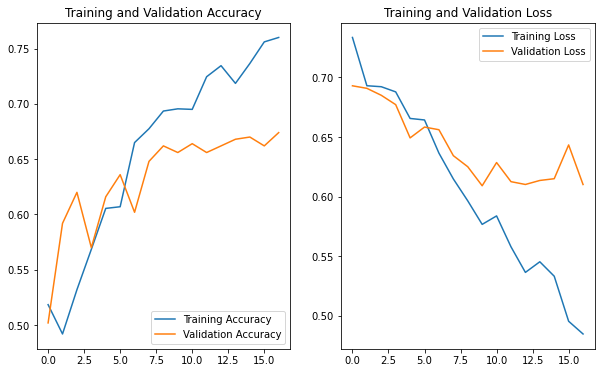

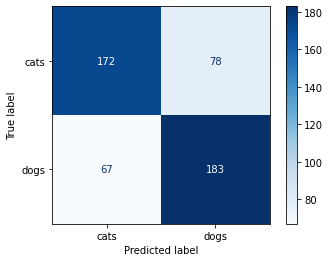

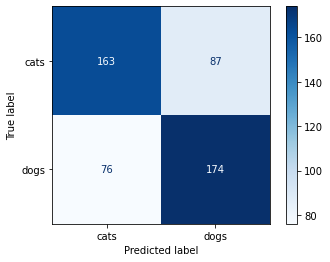


Falhou 145 de 500 exemplos
Taxa de acertos: 71.00%


In [6]:
y_pred = model.predict(test_ds)
y_pred = tf.argmax(y_pred, axis=1)

y_true = tf.concat([y for x, y in test_ds], axis=0)
y_true = tf.argmax(y_true, axis=1)

y_pred1 = model.predict(val_ds)
y_pred1 = tf.argmax(y_pred1, axis=1)

y_true1 = tf.concat([y for x, y in val_ds], axis=0)
y_true1 = tf.argmax(y_true1, axis=1)

# gerar graficos e matriz de confusao
cm = confusion_matrix(y_true, y_pred)
cm1 = confusion_matrix(y_true1, y_pred1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

# evolucao da loss e acertos
plt.figure(2, figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# matriz de confusao
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

plt.show()

# calcular acertos no conjunto de teste
misses = np.count_nonzero(y_true-y_pred)
accuracy = (TEST_SAMPLES - misses) / TEST_SAMPLES

print(f"\nFalhou {misses} de {TEST_SAMPLES} exemplos")
print(f"Taxa de acertos: {(accuracy*100):.2f}%")